In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz

In [30]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=11)

#Decision Tree Classifer 생성
dt_clf = DecisionTreeClassifier(random_state= 156)

# DecisionTreeClassifer 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [31]:
#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot파일 생성
export_graphviz(dt_clf, out_file = 'tree.dot', class_names = iris.target_names,
                feature_names = iris.feature_names, impurity = True, filled = True)


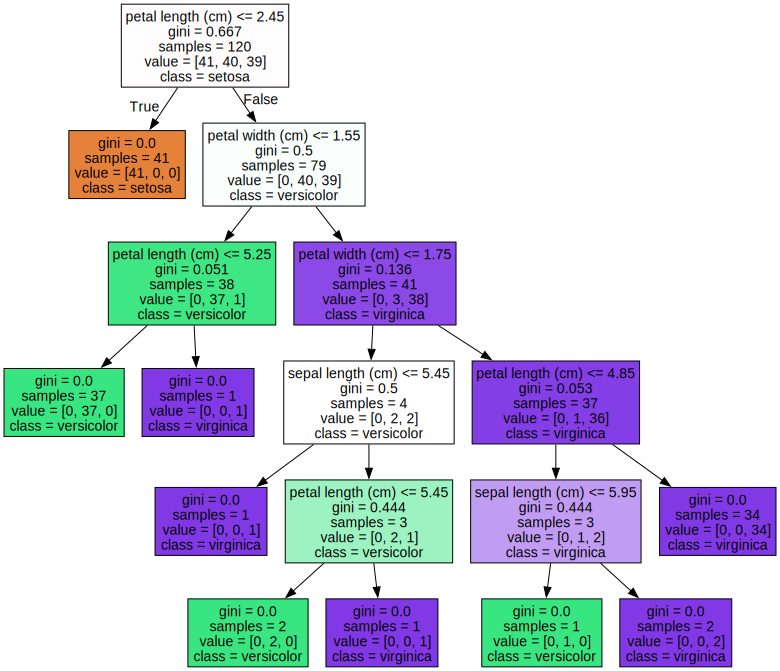

In [32]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [33]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

pred = dt_clf.predict(X_test)
print("accuracy :", np.round(accuracy_score(y_test,pred),3))
print("confusion matrix :\n", confusion_matrix(y_test,pred))
print('classification report :\n', classification_report(y_test,pred, target_names = iris.target_names))


accuracy : 0.933
confusion matrix :
 [[ 9  0  0]
 [ 0 10  0]
 [ 0  2  9]]
classification report :
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



In [34]:
#feature의 중요도 
dt_clf.feature_importances_

array([0.02500521, 0.        , 0.55490281, 0.42009198])

In [35]:
import seaborn as sns
%matplotlib inline


In [36]:
#하이퍼 파라미터 튜닝

from sklearn.model_selection import GridSearchCV

params = {
    'max_depth':[2,4,6,8,10],
    'min_samples_split' : [2,5,10,20],
    'min_samples_leaf' : [1,2,4,8],
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=11), 
             param_grid= params,
             scoring= 'accuracy',
             cv = 5,
             verbose= 1
             )

grid_search.fit(X_train, y_train)
print('최고 적합한 파라미터', grid_search.best_params_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
최고 적합한 파라미터 {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [37]:
best_model = grid_search.best_estimator_
best_pred = best_model.predict(X_test)
print('정확도 : ',np.round(accuracy_score(y_test, best_pred),2))

정확도 :  0.87


### 랜덤포레스트 

In [59]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
X_train = pd.read_csv('./data/UCI HAR Dataset/train/X_train.txt')
X_test = pd.read_csv('./data/UCI HAR Dataset/test/X_test.txt')

In [46]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [47]:
def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./data/UCI HAR Dataset/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./data/UCI HAR Dataset/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./data/UCI HAR Dataset/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./data/UCI HAR Dataset/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./data/UCI HAR Dataset/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test

In [48]:
X_train, X_test, y_train, y_test = get_human_dataset()

/var/folders/_f/zkkpxg4j4j5_dc9281g3t2pr0000gn/T/ipykernel_2972/4103130684.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[1] >0 else x[0] ,  axis=1)
/var/folders/_f/zkkpxg4j4j5_dc9281g3t2pr0000gn/T/ipykernel_2972/4103130684.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])


In [50]:
rf_clf = RandomForestClassifier(random_state= 0, max_depth=8) 
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print('정확도 : ',np.round(accuracy_score(y_test, pred),2))

/Users/pakeunseo/opt/anaconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


정확도 :  0.92


In [52]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth':[8,16,24],
    'min_samples_split' : [2,8,16],
    'min_samples_leaf' : [1,6,12],
}

#RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 2, n_jobs = -1)
grid_cv.fit(X_train, y_train)

/Users/pakeunseo/opt/anaconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/pakeunseo/opt/anaconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/pakeunseo/opt/anaconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/pakeunseo/opt/anaconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/base.py:1389: DataConversionWarni

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [8, 16, 24],
                         'min_samples_leaf': [1, 6, 12],
                         'min_samples_split': [2, 8, 16]})

In [58]:
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최적 예측 정확도: {0:4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 8, 'min_samples_leaf': 6, 'min_samples_split': 16}
최적 예측 정확도: 0.915941


In [61]:
rf_clf1 = RandomForestClassifier(n_estimators=100, min_samples_leaf = 6, 
                                 max_depth=16, min_samples_split =2 , random_state =0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:4f}'.format(accuracy_score(y_test, pred)))

/Users/pakeunseo/opt/anaconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


예측 정확도: 0.926026


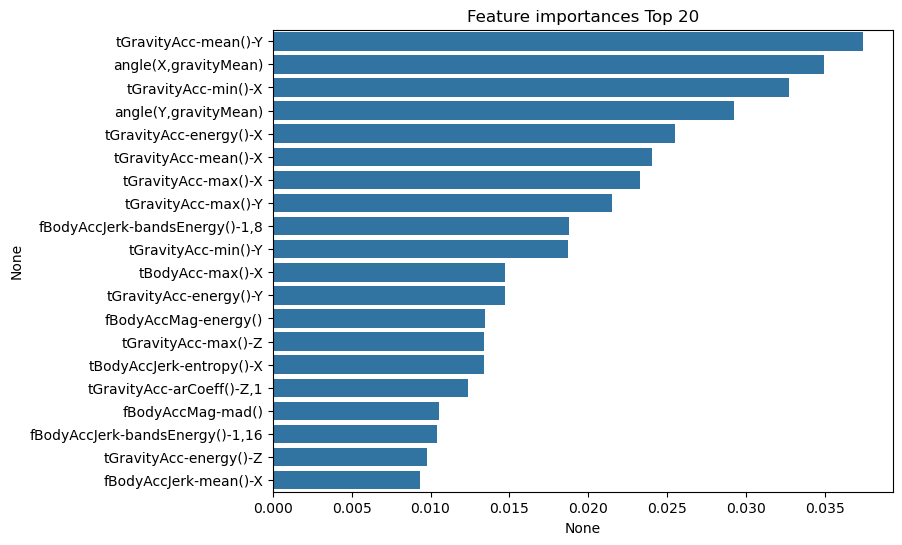

In [63]:
# 피쳐 중요도 시각화 

%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]

plt.figure(figsize = (8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()